##### Use AustraliaFiltered.xlsx dataset generated earlier.

- Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
- Find total immigrants from each category by area name and plot barchart for each area
- Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.
- Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).
- Plot Total Immigrants based on DevelopmenRegion 

  
- Plot immigration trend for India using line plot
- Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot
- For the above use area plot with alpha = 0.5


- Compare Immigration Trend for top-5 countires using stacked area plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('AustraliaFiltered.xlsx')
print(df.head())

   Unnamed: 0         Country AreaName           Region             DevName  \
0         224     Afghanistan     Asia    Southern Asia  Developing regions   
1         225         Albania   Europe  Southern Europe   Developed regions   
2         226         Algeria   Africa  Northern Africa  Developing regions   
3         227  American Samoa  Oceania        Polynesia  Developing regions   
4         228         Andorra   Europe  Southern Europe   Developed regions   

   1980  1981  1982  1983  1984  ...  2000  2001  2002  2003  2004  2005  \
0    10    20    30    30    70  ...   100    20    40    70    80   110   
1     0     0     0     0     0  ...   110   110   200   250   140   130   
2    10    50    30    10    20  ...    20    30    60    20    20    50   
3     0     0     0     0     0  ...     0     0     0     0     0     0   
4     0     0    10     0     0  ...     0    10    10     0    10    10   

   2006  2007  2008  Total  
0   180   140   560   4630  
1   110   

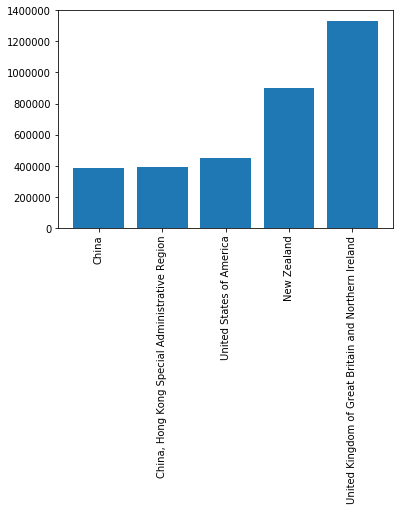

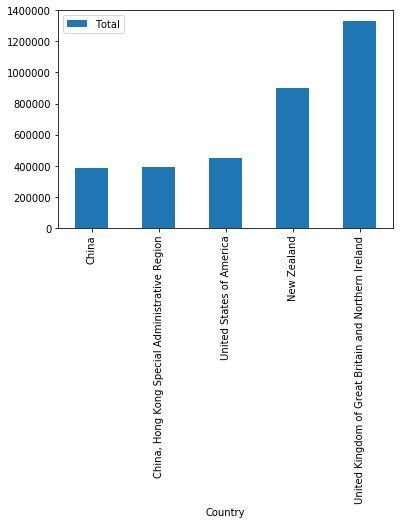

In [3]:
# Plot bar chart of total no of immigrants for countires top 5 countires 
# having max no of total immigrants
data = df.sort_values(by = 'Total').tail() 
plt.bar(data.Country.values, data.Total.values)
plt.xticks(rotation = 90)

data.plot(x = 'Country', y = 'Total', kind = 'bar')

plt.show()


AreaName
Africa                              354440
Asia                               3463640
Europe                             2166780
Latin America and the Caribbean     120350
Northern America                    592060
Oceania                            1126180
Name: Total, dtype: int64


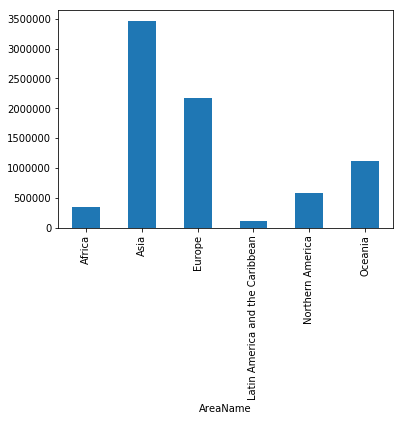

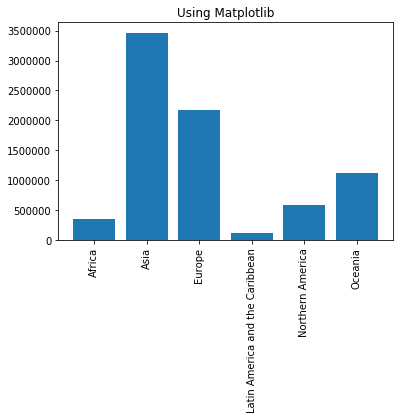

In [4]:
# Find total immigrants from each category by area name and plot barchart for each area
grp = df.groupby('AreaName')

#pandas
# get sum for Total Column on the group object => gives a series
data = grp.Total.sum()
print(data)
data.plot(kind = 'bar')
plt.show()

plt.bar(data.index, data.values)
plt.xticks(rotation = 90)
plt.title('Using Matplotlib')
plt.show()

     1980    1981    1982    1983    1984    1985    1986    1987    1988  \
0  180230  208250  191190  150350  149560  167940  191310  215100  247500   

     1989  ...    1999    2000    2001    2002    2003    2004    2005  \
0  232690  ...  287020  312060  351320  359830  386690  349340  361670   

     2006    2007    2008  
0  399890  442340  531000  

[1 rows x 29 columns]


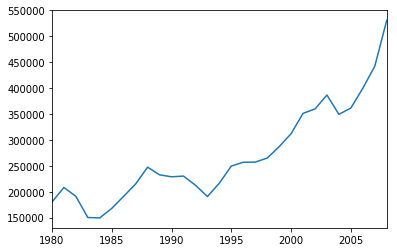

In [5]:
# Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.

#recalculate the total for each year since we dropped the total row earlier
world = df.loc[:, '1980':'2008'].sum()
print(world.to_frame().T)

world.plot(kind = 'line')

# try using matplotlib yourself  :-P

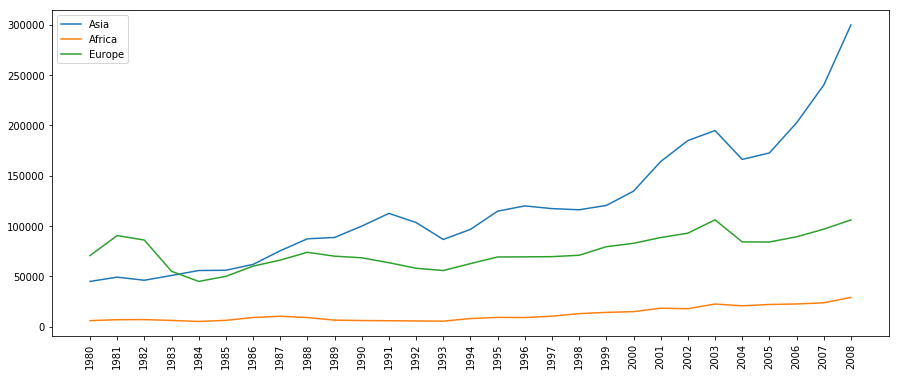

In [6]:
# Compare Immigration Trend for Asia, Africa and Europe Areas (Use Line plot).

plt.figure(figsize = (15,6))
grp = df.groupby('AreaName')

asia = grp.get_group('Asia').loc[:,'1980':'2008'].sum()
plt.plot(asia, label = 'Asia')

asia = grp.get_group('Africa').loc[:,'1980':'2008'].sum()
plt.plot(asia, label = 'Africa')

asia = grp.get_group('Europe').loc[:,'1980':'2008'].sum()
plt.plot(asia, label = 'Europe')

plt.legend()
plt.xticks(rotation = 90)
plt.show()


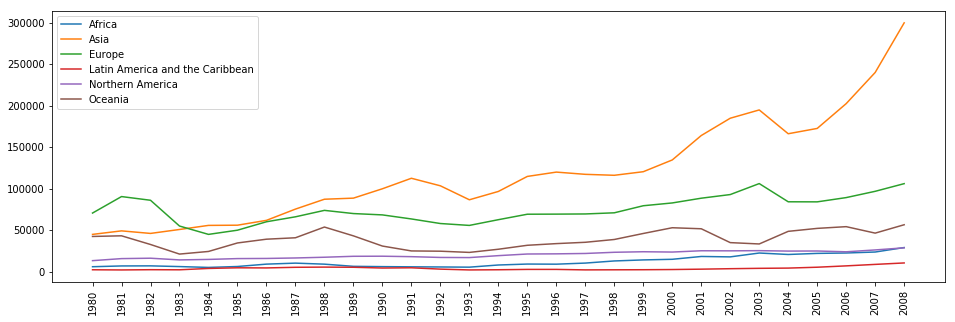

In [8]:
# Plot Total Immigrants based on DevelopmenRegion 

plt.figure(figsize=(16,5))

years = map(str, list(range(1980,2009)))
years = list(years)

res = df.groupby('AreaName')[years].sum() # group by area and take out years data
for row in res.index:
    plt.plot(res.loc[row], label = row)
    
plt.xticks(rotation = 90)
plt.legend()
plt.show()

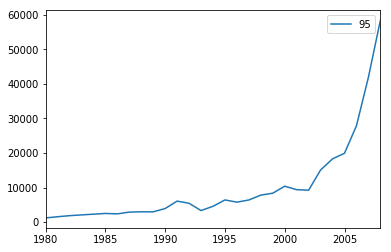

In [9]:
# Plot immigration trend for India using line plot

idx = df.index[df.Country == 'India']
data = df.loc[idx].loc[:, '1980': '2008'].T
data.plot(kind = 'line')
plt.show()


<Figure size 1152x360 with 0 Axes>

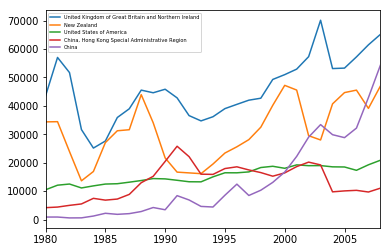

In [10]:
# Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot

plt.figure(figsize=(16,5))
data = df.sort_values(by = 'Total', ascending= False).head()
label = data.Country
values = data.loc[:,'1980':'2008']


df1 = pd.DataFrame(values.T)
df1.columns = label


df1.plot(kind = 'line')
plt.legend(fontsize=5)
plt.show()

<Figure size 1152x360 with 0 Axes>

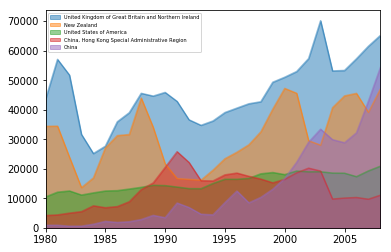

In [11]:
# For the above use area plot with alpha = 0.5
plt.figure(figsize=(16,5))
data = df.sort_values(by = 'Total', ascending= False).head()
label = data.Country
values = data.loc[:,'1980':'2008']

# build a dataframe to represent Data
df1 = pd.DataFrame(values.T)
df1.columns = label


df1.plot(kind = 'area', stacked = False, alpha = 0.5)
plt.legend(fontsize=5)
plt.show()

<Figure size 1152x360 with 0 Axes>

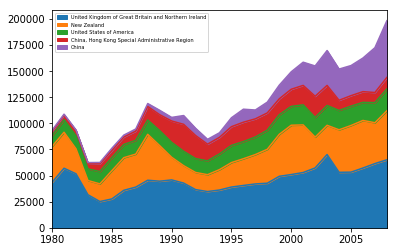

In [12]:
# Compare Immigration Trend for top-5 countires using stacked area plot
# For the above use area plot with alpha = 0.5
plt.figure(figsize=(16,5))
data = df.sort_values(by = 'Total', ascending= False).head()
label = data.Country
values = data.loc[:,'1980':'2008']


df1 = pd.DataFrame(values.T)
df1.columns = label

df1.plot(kind = 'area', stacked = True)
plt.legend(fontsize=5)
plt.show()